# Historical OHLCV from REST: Build Candlestick Charts

## Introduction

This tutorial demonstrates how to fetch historical OHLCV (Open, High, Low, Close, Volume) data from the CoinAPI REST API and create professional candlestick charts. You'll learn how to retrieve historical price data for cryptocurrency pairs and visualize them using matplotlib and mplfinance.

### What You Will Learn

- How to authenticate with the CoinAPI REST API
- How to fetch historical OHLCV data with specific parameters
- How to process and clean the API response data
- How to create professional candlestick charts
- How to analyze price trends and patterns

### Prerequisites

- Python 3.7+
- Required packages: requests, pandas, numpy, matplotlib, mplfinance
- CoinAPI API key (free tier available)

### Setup Instructions

1. Install required packages: `pip install requests pandas numpy matplotlib mplfinance`
2. Get your free API key from [CoinAPI](https://www.coinapi.io/)
3. Replace API_KEY placeholder in the code below

## 1. Environment Setup

Set up your environment with necessary imports and configuration for working with the CoinAPI REST API.

In [ ]:
# Import required libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime, timedelta
import json

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# API configuration
API_KEY = "YOUR_API_KEY_HERE"  # Replace with your actual API key
BASE_URL = "https://rest.coinapi.io/v1"

# Editable parameters
SYMBOL_ID = "BINANCE_SPOT_BTC_USDT"
PERIOD_ID = "1HRS"
TIME_START = "2025-07-07T00:00:00"
TIME_END = "2025-07-14T00:00:00"
LIMIT = 200

print("Environment setup complete!")
print(f"Using API base URL: {BASE_URL}")
print(f"API Key configured: {'Yes' if API_KEY != 'YOUR_API_KEY_HERE' else 'No (Please update)'}")
print(f"Target symbol: {SYMBOL_ID}")
print(f"Time period: {TIME_START} to {TIME_END}")
print(f"Data interval: {PERIOD_ID}")

## 2. Fetch Historical OHLCV Data

Now we'll fetch historical OHLCV data from the CoinAPI REST API using the specified parameters. We'll make a request to the `/ohlcv/:symbol_id/history` endpoint with our query parameters.

In [ ]:
def fetch_ohlcv_data(symbol_id, period_id, time_start, time_end, limit):
    """
    Fetch historical OHLCV data from CoinAPI REST API
    
    Args:
        symbol_id (str): Trading pair identifier (e.g., BINANCE_SPOT_BTC_USDT)
        period_id (str): Time period for each candle (e.g., 1HRS, 1DAY)
        time_start (str): Start time in ISO format
        time_end (str): End time in ISO format
        limit (int): Maximum number of candles to return
    
    Returns:
        dict: API response with OHLCV data
    """
    endpoint = f"/ohlcv/{symbol_id}/history"
    url = BASE_URL + endpoint
    
    # Query parameters
    params = {
        'period_id': period_id,
        'time_start': time_start,
        'time_end': time_end,
        'limit': limit
    }
    
    # Headers with API key
    headers = {
        'X-CoinAPI-Key': API_KEY
    }
    
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

# Fetch the data
print("Fetching historical OHLCV data...")
ohlcv_data = fetch_ohlcv_data(SYMBOL_ID, PERIOD_ID, TIME_START, TIME_END, LIMIT)

if ohlcv_data:
    print(f"Successfully fetched {len(ohlcv_data)} OHLCV records")
    print("Sample data structure:")
    if ohlcv_data:
        print(f"First record: {ohlcv_data[0]}")
else:
    print("Failed to fetch data. Please check your API key and parameters.")

## 3. Data Processing and Analysis

Now we'll process the raw API response data into a pandas DataFrame and perform some basic analysis. We'll convert timestamps, calculate additional metrics, and prepare the data for visualization.

In [ ]:
def process_ohlcv_data(raw_data):
    """
    Process raw OHLCV data into a pandas DataFrame
    
    Args:
        raw_data (list): Raw API response data
    
    Returns:
        pd.DataFrame: Processed OHLCV data
    """
    if not raw_data:
        return None
    
    # Convert to DataFrame
    df = pd.DataFrame(raw_data)
    
    # Convert timestamp to datetime
    df['time_period_start'] = pd.to_datetime(df['time_period_start'])
    df['time_period_end'] = pd.to_datetime(df['time_period_end'])
    
    # Set time_period_start as index
    df.set_index('time_period_start', inplace=True)
    
    # Sort by time
    df.sort_index(inplace=True)
    
    # Calculate additional metrics
    df['price_change'] = df['price_close'] - df['price_open']
    df['price_change_pct'] = (df['price_change'] / df['price_open']) * 100
    df['body_size'] = abs(df['price_close'] - df['price_open'])
    df['upper_shadow'] = df['price_high'] - df[['price_open', 'price_close']].max(axis=1)
    df['lower_shadow'] = df[['price_open', 'price_close']].min(axis=1) - df['price_low']
    
    return df

# Process the data
if ohlcv_data:
    df = process_ohlcv_data(ohlcv_data)
    
    if df is not None:
        print("Data processing complete!")
        print(f"DataFrame shape: {df.shape}")
        print("\nFirst few rows:")
        print(df.head())
        
        print("\nData summary:")
        print(df.describe())
        
        print("\nPrice statistics:")
        print(f"Price range: ${df['price_low'].min():.2f} - ${df['price_high'].max():.2f}")
        print(f"Average volume: {df['volume_traded'].mean():.2f}")
        print(f"Total price change: {df['price_change'].sum():.2f} USDT")
        print(f"Average price change: {df['price_change_pct'].mean():.2f}%")
    else:
        print("Failed to process data.")
else:
    print("No data to process.")

## 4. Creating Professional Candlestick Charts

Now we'll create professional candlestick charts using mplfinance, which is specifically designed for financial data visualization. We'll create multiple chart types to analyze different aspects of the price data.

Creating candlestick chart...
OHLCV DataFrame shape: (168, 5)
OHLCV DataFrame columns: ['Open', 'High', 'Low', 'Close', 'Volume']

First few rows of OHLCV data:
                                Open       High        Low      Close  \
time_period_start                                                       
2025-07-07 00:00:00+00:00  109203.85  109288.02  108800.01  108823.07   
2025-07-07 01:00:00+00:00  108823.07  109089.00  108679.75  109019.12   
2025-07-07 02:00:00+00:00  109019.12  109499.99  109019.12  109364.52   
2025-07-07 03:00:00+00:00  109364.53  109700.00  109364.52  109389.47   
2025-07-07 04:00:00+00:00  109389.46  109447.54  109128.72  109128.73   

                              Volume  
time_period_start                     
2025-07-07 00:00:00+00:00  253.53776  
2025-07-07 01:00:00+00:00  299.50777  
2025-07-07 02:00:00+00:00  433.77607  
2025-07-07 03:00:00+00:00  326.47933  
2025-07-07 04:00:00+00:00  184.06878  
Candlestick chart created and saved as 'candlestick_ch

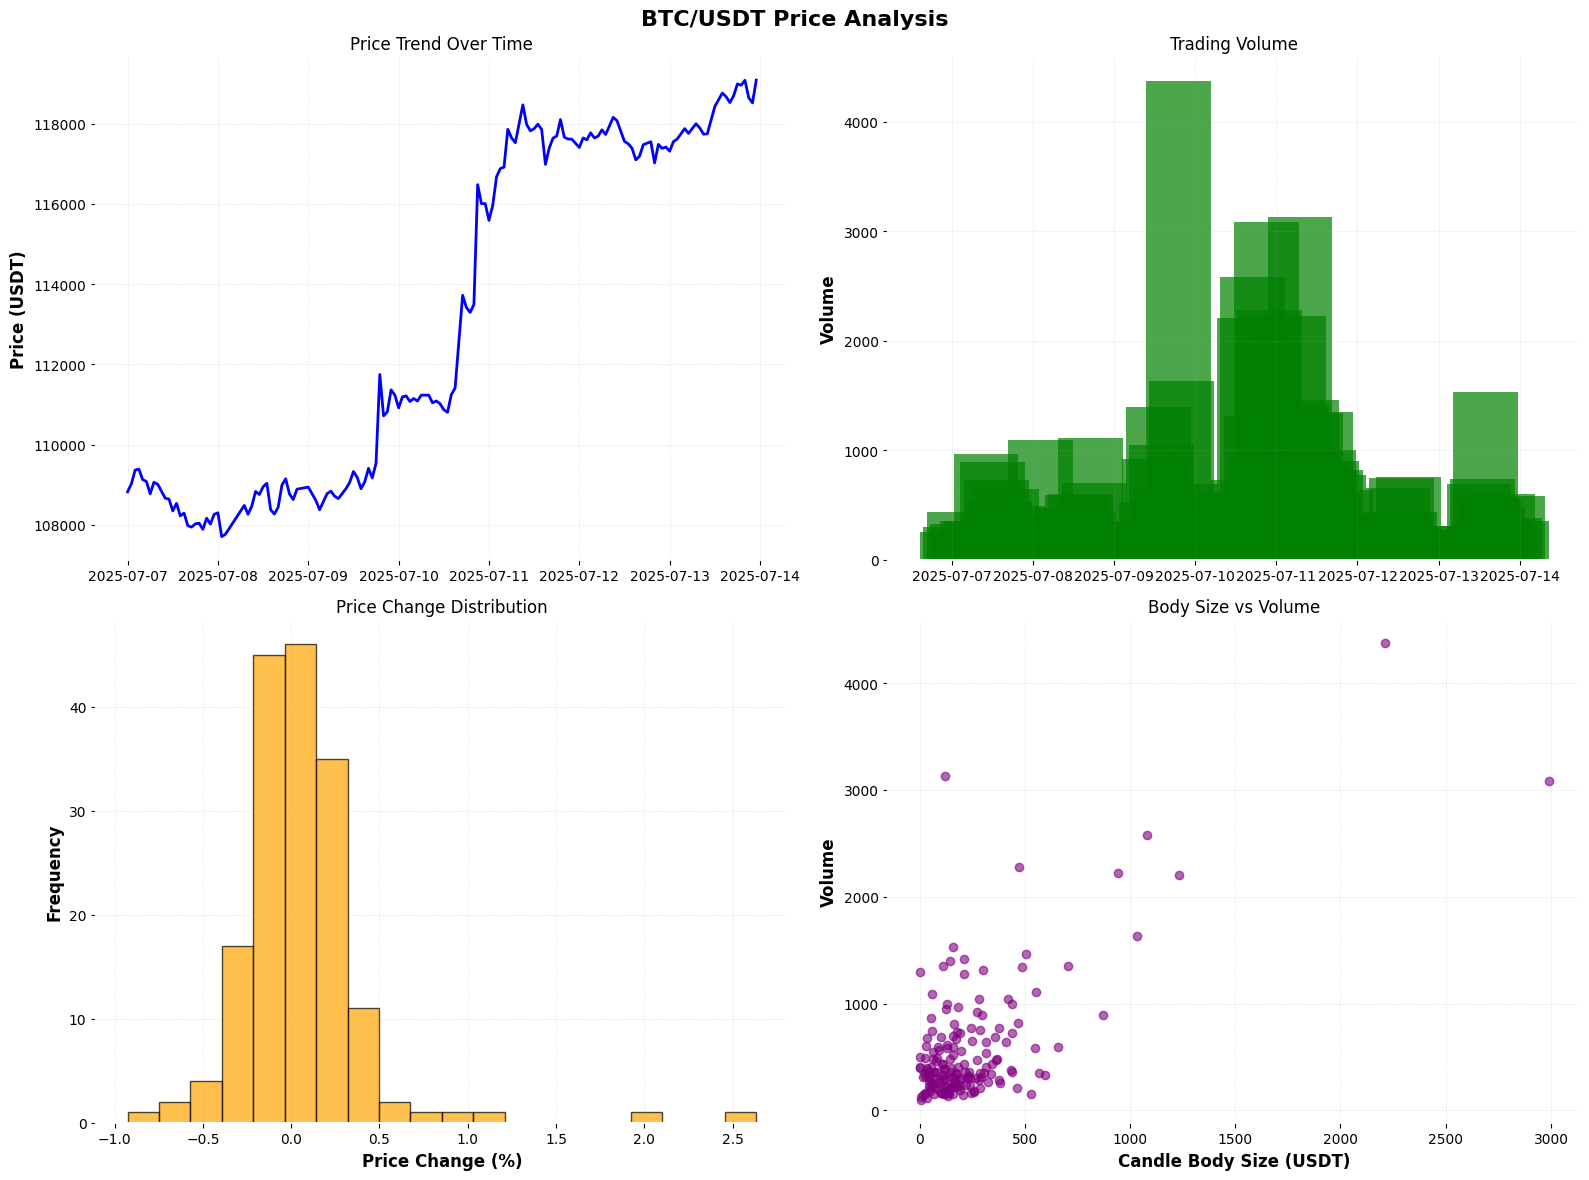

Price analysis charts created and saved as 'price_analysis_charts.png'

All visualizations complete!


In [5]:
def create_candlestick_chart(df, title="BTC/USDT Candlestick Chart"):
    """
    Create a professional candlestick chart using mplfinance
    
    Args:
        df (pd.DataFrame): OHLCV data with datetime index
        title (str): Chart title
    """
    # Create a clean DataFrame with only the required OHLCV columns
    # The actual column names from the API are: price_open, price_high, price_low, price_close, volume_traded
    ohlcv_df = df[['price_open', 'price_high', 'price_low', 'price_close', 'volume_traded']].copy()
    
    # Rename columns to the standard OHLCV format expected by mplfinance
    ohlcv_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    print("OHLCV DataFrame shape:", ohlcv_df.shape)
    print("OHLCV DataFrame columns:", ohlcv_df.columns.tolist())
    print("\nFirst few rows of OHLCV data:")
    print(ohlcv_df.head())
    
    # Create the candlestick chart
    mpf.plot(ohlcv_df, 
             type='candle', 
             title=title,
             ylabel='Price (USDT)',
             volume=True,
             style='charles',
             figsize=(14, 8),
             panel_ratios=(3, 1),
             savefig='candlestick_chart.png')
    
    print("Candlestick chart created and saved as 'candlestick_chart.png'")

def create_price_analysis_charts(df):
    """
    Create additional analysis charts
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('BTC/USDT Price Analysis', fontsize=16, fontweight='bold')
    
    # Price trend over time
    axes[0, 0].plot(df.index, df['price_close'], linewidth=2, color='blue')
    axes[0, 0].set_title('Price Trend Over Time')
    axes[0, 0].set_ylabel('Price (USDT)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Volume analysis
    axes[0, 1].bar(df.index, df['volume_traded'], alpha=0.7, color='green')
    axes[0, 1].set_title('Trading Volume')
    axes[0, 1].set_ylabel('Volume')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Price change distribution
    axes[1, 0].hist(df['price_change_pct'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].set_title('Price Change Distribution')
    axes[1, 0].set_xlabel('Price Change (%)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Body size vs volume scatter
    axes[1, 1].scatter(df['body_size'], df['volume_traded'], alpha=0.6, color='purple')
    axes[1, 1].set_title('Body Size vs Volume')
    axes[1, 1].set_xlabel('Candle Body Size (USDT)')
    axes[1, 1].set_ylabel('Volume')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('price_analysis_charts.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Price analysis charts created and saved as 'price_analysis_charts.png'")

# Create the charts
if 'df' in locals() and df is not None:
    print("Creating candlestick chart...")
    create_candlestick_chart(df)
    
    print("\nCreating price analysis charts...")
    create_price_analysis_charts(df)
    
    print("\nAll visualizations complete!")
else:
    print("No data available for visualization. Please run the data processing cell first.")

## 5. Conclusion and Next Steps

Congratulations! You've successfully fetched historical OHLCV data from the CoinAPI REST API and built professional candlestick charts.

### What We Accomplished

- Successfully connected to the CoinAPI REST API using proper authentication
- Fetched historical OHLCV data for BTC/USDT with specific parameters
- Processed and analyzed the raw API response data
- Created professional candlestick charts using mplfinance
- Generated additional analysis charts for deeper insights
- Saved all visualizations as high-quality image files

### Key Takeaways

- The CoinAPI REST API provides clean, structured OHLCV data
- Proper data processing is essential for financial analysis
- Volume analysis provides valuable insights into market activity
- Historical data analysis helps identify patterns and trends


### API Endpoint Reference

- **Base URL**: `https://rest.coinapi.io/v1`
- **Endpoint**: `/ohlcv/:symbol_id/history`
- **Documentation**: [CoinAPI OHLCV Historical Data](https://docs.coinapi.io/market-data/rest-api/ohlcv/historical-data)

---

**Happy analyzing!**